In [22]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and also pull out column names and some summary statistics for ratings.

In [23]:
raw_data = pd.read_csv('data/epicurious/epi_r.csv')

In [24]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [25]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

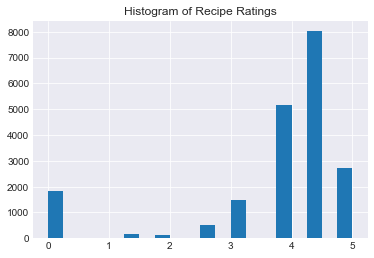

In [26]:
sns.set_style("darkgrid")

raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [27]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

# Remove Nulls but include Dietary

In [28]:
df = raw_data.dropna()

# Create Feature

In [29]:
dummy = pd.get_dummies((df.rating >= 3.5), prefix='high_rating')

In [30]:
df = df.merge(dummy, left_index=True, right_index=True)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,high_rating_False,high_rating_True
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


# Try predicting a high rating using just nutrition info

In [31]:
from sklearn.svm import SVR
svr = SVR()

X = df[['calories', 'protein', 'fat', 'sodium']]
Y = df.rating

svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

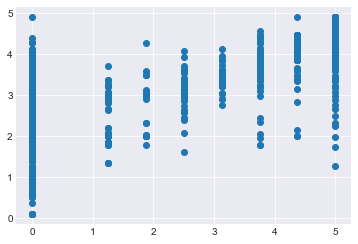

In [32]:
plt.scatter(Y, svr.predict(X))

In [33]:
svr.score(X, Y)

0.5670895690804438

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.08307481, 0.06269616, 0.06296291, 0.05585074, 0.06144234])

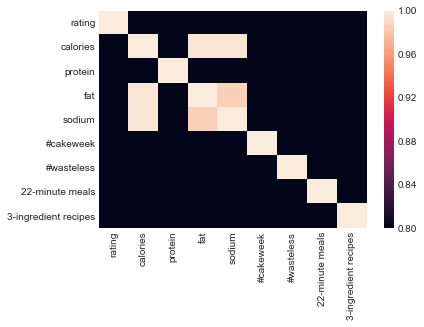

In [35]:
g = sns.heatmap(df.iloc[:, :10].corr(), vmin= 0.8)

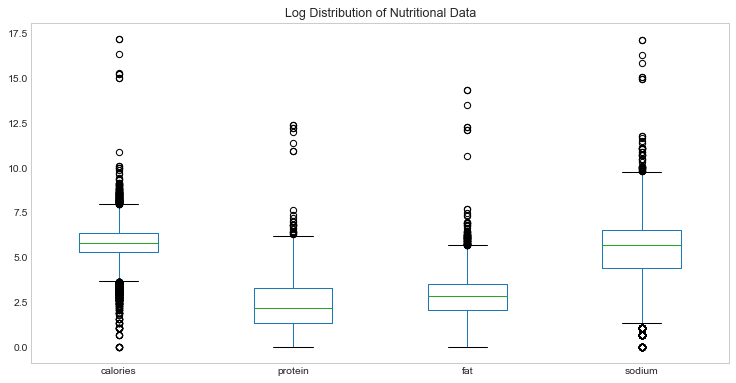

In [36]:
sns.set_style("whitegrid")
plt.figure(dpi=75, figsize=(12,6))
np.log(df[['calories', 'protein', 'fat', 'sodium']]+1).boxplot(grid=False)
plt.title("Log Distribution of Nutritional Data")
plt.show()


In [37]:
features = np.log(df[['calories', 'protein', 'fat', 'sodium']]+1)

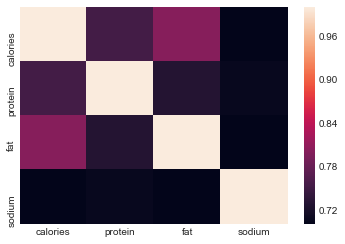

In [38]:
import seaborn as sns

g = sns.heatmap(features.corr(), vmin= 0.7)

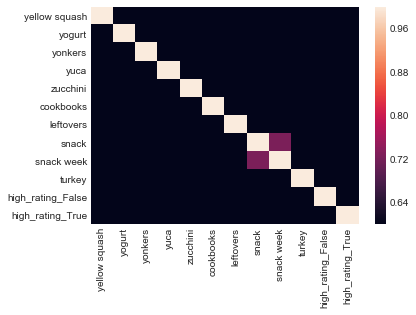

In [39]:
import seaborn as sns

g = sns.heatmap(df.iloc[:, 670:].corr(), vmin= 0.6)

In [40]:
#count % of zeros
(df[df == 0].count()/df.count()).sort_values()

title                0.000000
calories             0.000504
sodium               0.003278
protein              0.052068
fat                  0.076778
rating               0.081694
high_rating_True     0.193520
bon appétit          0.534607
peanut free          0.576336
soy free             0.590141
gourmet              0.641768
tree nut free        0.645991
vegetarian           0.651475
kosher               0.685767
pescatarian          0.692637
quick & easy         0.734556
wheat/gluten-free    0.754097
bake                 0.765192
summer               0.795134
high_rating_False    0.806480
dessert              0.813918
winter               0.837305
side                 0.838502
fall                 0.842410
dairy free           0.843041
no sugar added       0.847579
kidney friendly      0.878782
sugar conscious      0.879223
dinner               0.880358
onion                0.883510
                       ...   
quiche               0.999937
rub                  0.999937
spain     

In [41]:
X = df[(df[df == 0].count()).sort_values()[:30].index.values].drop(['title', 'rating', 'high_rating_True'], 1)
Y = df.high_rating_True


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(X,Y)
display(svc.score(X, Y))
display(cross_val_score(svc, X, y=Y, cv=5))

0.9682929904185578

array([0.83107469, 0.82855342, 0.82823826, 0.83296565, 0.83196721])